# This is a short introduction of Pandas for Pratice session 

In [106]:
# we import as follows
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# object Creation 

Creating s SERIES by passing list of values, letting pandas create a default integer index

In [2]:
s = pd.Series([1,3,5,np.nan,5,6,7])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    5.0
5    6.0
6    7.0
dtype: float64

Creating a DATAFRAME by passing a numpy array, with a datetime index and labled columns 

In [3]:
dates= pd.date_range('20210101',periods=6)
dates

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df=pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2021-01-01,1.551620,-0.817919,-1.280884,-1.134517
2021-01-02,-0.675342,-1.075331,0.617850,0.406777
2021-01-03,-0.476723,1.253737,-0.072375,-0.055763
2021-01-04,0.490392,-0.749848,0.827658,0.734913
2021-01-05,-0.675232,0.979605,2.059946,-0.471373
2021-01-06,2.132374,-0.620940,-0.077464,0.304613


Creating a DATAFRAME by passing a dict of objects that can be converted to series-like

In [5]:
df2 = pd.DataFrame({'A' : 1.,
                    'B': pd.Timestamp('20210102'),
                   'C': pd.Series(1, index=list(range(4)),dtype='float'),
                   'D' :np.array([3]*4,dtype='int32'),
                   'E' : pd.Categorical(["test","train","test","train"]),
                   'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2021-01-02,1.0,3,test,foo
1,1.0,2021-01-02,1.0,3,train,foo
2,1.0,2021-01-02,1.0,3,test,foo
3,1.0,2021-01-02,1.0,3,train,foo


In [6]:
# having specific dtypes
df2.dtypes

A          float64
B    datetime64[s]
C          float64
D            int32
E         category
F           object
dtype: object

# Viewing Data

See the top & bottom rows of the frame

In [7]:
df.head()

,A,B,C,D
2021-01-01,1.551620,-0.817919,-1.280884,-1.134517
2021-01-02,-0.675342,-1.075331,0.617850,0.406777
2021-01-03,-0.476723,1.253737,-0.072375,-0.055763
2021-01-04,0.490392,-0.749848,0.827658,0.734913
2021-01-05,-0.675232,0.979605,2.059946,-0.471373


In [8]:
df.tail(3)

,A,B,C,D
2021-01-04,0.490392,-0.749848,0.827658,0.734913
2021-01-05,-0.675232,0.979605,2.059946,-0.471373
2021-01-06,2.132374,-0.620940,-0.077464,0.304613


Display the index, columns and the underlying numpy data

In [9]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values

array([[ 1.55162038, -0.81791938, -1.28088355, -1.13451666],
       [-0.67534176, -1.07533115,  0.61785034,  0.406777  ],
       [-0.47672252,  1.25373657, -0.07237451, -0.0557627 ],
       [ 0.49039188, -0.74984839,  0.82765848,  0.73491287],
       [-0.67523169,  0.97960469,  2.05994558, -0.47137313],
       [ 2.1323744 , -0.62094016, -0.07746439,  0.304613  ]])

Describe shows a quick statistic summary of your data

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.391182,-0.171783,0.345789,-0.035892
std,1.217882,1.012679,1.117552,0.678683
min,-0.675342,-1.075331,-1.280884,-1.134517
25%,-0.625604,-0.800902,-0.076192,-0.367471
50%,0.006835,-0.685394,0.272738,0.124425
75%,1.286313,0.579468,0.775206,0.381236
max,2.132374,1.253737,2.059946,0.734913


Transposing your data 

In [13]:
df.T

,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06
A,1.551620,-0.675342,-0.476723,0.490392,-0.675232,2.132374
B,-0.817919,-1.075331,1.253737,-0.749848,0.979605,-0.620940
C,-1.280884,0.617850,-0.072375,0.827658,2.059946,-0.077464
D,-1.134517,0.406777,-0.055763,0.734913,-0.471373,0.304613


Sorting by an axis

In [14]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2021-01-01,-1.134517,-1.280884,-0.817919,1.551620
2021-01-02,0.406777,0.617850,-1.075331,-0.675342
2021-01-03,-0.055763,-0.072375,1.253737,-0.476723
2021-01-04,0.734913,0.827658,-0.749848,0.490392
2021-01-05,-0.471373,2.059946,0.979605,-0.675232
2021-01-06,0.304613,-0.077464,-0.620940,2.132374


Sorting by values

In [15]:
df.sort_values(by='B')

,A,B,C,D
2021-01-02,-0.675342,-1.075331,0.617850,0.406777
2021-01-01,1.551620,-0.817919,-1.280884,-1.134517
2021-01-04,0.490392,-0.749848,0.827658,0.734913
2021-01-06,2.132374,-0.620940,-0.077464,0.304613
2021-01-05,-0.675232,0.979605,2.059946,-0.471373
2021-01-03,-0.476723,1.253737,-0.072375,-0.055763


# Selection 

Note: While standard Python/NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat,.loc, .iloc and .ix.

In [16]:
# Getting 

Selecting a single column, which yields a Series, equivalent to df.A

In [17]:
df['A']

2021-01-01    1.551620
2021-01-02   -0.675342
2021-01-03   -0.476723
2021-01-04    0.490392
2021-01-05   -0.675232
2021-01-06    2.132374
Freq: D, Name: A, dtype: float64

Selecting via [ ], which slices the rows.

In [18]:
df[0:3]

,A,B,C,D
2021-01-01,1.551620,-0.817919,-1.280884,-1.134517
2021-01-02,-0.675342,-1.075331,0.617850,0.406777
2021-01-03,-0.476723,1.253737,-0.072375,-0.055763


In [19]:
df['20210101':'20210104']

,A,B,C,D
2021-01-01,1.551620,-0.817919,-1.280884,-1.134517
2021-01-02,-0.675342,-1.075331,0.617850,0.406777
2021-01-03,-0.476723,1.253737,-0.072375,-0.055763
2021-01-04,0.490392,-0.749848,0.827658,0.734913


# Selection by Label

In [20]:
df.loc[dates[0]]

A    1.551620
B   -0.817919
C   -1.280884
D   -1.134517
Name: 2021-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label

In [21]:
df.loc[:,['A','B']]

,A,B
2021-01-01,1.551620,-0.817919
2021-01-02,-0.675342,-1.075331
2021-01-03,-0.476723,1.253737
2021-01-04,0.490392,-0.749848
2021-01-05,-0.675232,0.979605
2021-01-06,2.132374,-0.620940


Showing label slicing ,both endpoints are included

In [22]:
df.loc['20210101':'20210104',['A','B']]

,A,B
2021-01-01,1.551620,-0.817919
2021-01-02,-0.675342,-1.075331
2021-01-03,-0.476723,1.253737
2021-01-04,0.490392,-0.749848


Reduction in the dimensions of the returned objects 

In [23]:
df.loc['20210101',['A','B']]

A    1.551620
B   -0.817919
Name: 2021-01-01 00:00:00, dtype: float64

For getting a scalar value

In [24]:
df.loc[dates[0],'A']

1.5516203778218103

For getting fast access to a scalar (equiv to the prior method)

In [25]:
df.at[dates[0],'A']

1.5516203778218103

# Selction by Position

select via the position of the passed integers

In [26]:
df.iloc[3]

A    0.490392
B   -0.749848
C    0.827658
D    0.734913
Name: 2021-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [27]:
df.iloc[3:5,0:2]

,A,B
2021-01-04,0.490392,-0.749848
2021-01-05,-0.675232,0.979605


By lists of integer position locations, similar to the numpy/python style

In [28]:
df.iloc[[1,2,4],[0,2]]

,A,C
2021-01-02,-0.675342,0.617850
2021-01-03,-0.476723,-0.072375
2021-01-05,-0.675232,2.059946


For slicing rows explicitly

In [29]:
df.iloc[1:3,:]

,A,B,C,D
2021-01-02,-0.675342,-1.075331,0.617850,0.406777
2021-01-03,-0.476723,1.253737,-0.072375,-0.055763


For slicing columns explicitly

In [30]:
df.iloc[:1:3]

,A,B,C,D
2021-01-01,1.55162,-0.817919,-1.280884,-1.134517


For getting a value explicitly

In [31]:
df.iloc[1,1]

-1.0753311531787335

For getting fast access to a scalar (equiv to the prior method)

In [32]:
df.iat[1,1]

-1.0753311531787335

# Boolean Indexing

Using a single column's values to select data.

In [33]:
df[df.A>0]

,A,B,C,D
2021-01-01,1.551620,-0.817919,-1.280884,-1.134517
2021-01-04,0.490392,-0.749848,0.827658,0.734913
2021-01-06,2.132374,-0.620940,-0.077464,0.304613


A where operation for getting

In [34]:
df[df>0]

,A,B,C,D
2021-01-01,1.551620,NaN,NaN,NaN
2021-01-02,NaN,NaN,0.617850,0.406777
2021-01-03,NaN,1.253737,NaN,NaN
2021-01-04,0.490392,NaN,0.827658,0.734913
2021-01-05,NaN,0.979605,2.059946,NaN
2021-01-06,2.132374,NaN,NaN,0.304613


Using the isin() method for filtering :

In [35]:
df2 = df.copy()
df2['E']= ['one','one','two','three','four','three']
df2

,A,B,C,D,E
2021-01-01,1.551620,-0.817919,-1.280884,-1.134517,one
2021-01-02,-0.675342,-1.075331,0.617850,0.406777,one
2021-01-03,-0.476723,1.253737,-0.072375,-0.055763,two
2021-01-04,0.490392,-0.749848,0.827658,0.734913,three
2021-01-05,-0.675232,0.979605,2.059946,-0.471373,four
2021-01-06,2.132374,-0.620940,-0.077464,0.304613,three


In [36]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2021-01-03,-0.476723,1.253737,-0.072375,-0.055763,two
2021-01-05,-0.675232,0.979605,2.059946,-0.471373,four


# Setting

Setting a new column automatically aligns the data by the indexes

In [37]:
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20210101',periods=6))
s1

2021-01-01    1
2021-01-02    2
2021-01-03    3
2021-01-04    4
2021-01-05    5
2021-01-06    6
Freq: D, dtype: int64

In [38]:
df['F'] =s1

Setting values by label

In [39]:
df.at[dates[0],'A'] = 0

Setting values by position

In [40]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [41]:
df.loc[:,'D'] = np.array([5]*len(df))

 The results of the prior setting operations

In [42]:
df

,A,B,C,D,F
2021-01-01,0.000000,0.000000,-1.280884,5.0,1
2021-01-02,-0.675342,-1.075331,0.617850,5.0,2
2021-01-03,-0.476723,1.253737,-0.072375,5.0,3
2021-01-04,0.490392,-0.749848,0.827658,5.0,4
2021-01-05,-0.675232,0.979605,2.059946,5.0,5
2021-01-06,2.132374,-0.620940,-0.077464,5.0,6


# Missing Data

pandas primarily uses the value np.nan to represent missing data.It is by default not included in compiutations . see the missing data sectuion 

Reindexing allows you to change/add/delete the index on a specified axis. this returns a copy of the data

In [43]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns)+['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2021-01-01,0.000000,0.000000,-1.280884,5.0,1,1.0
2021-01-02,-0.675342,-1.075331,0.617850,5.0,2,1.0
2021-01-03,-0.476723,1.253737,-0.072375,5.0,3,NaN
2021-01-04,0.490392,-0.749848,0.827658,5.0,4,NaN


To drop any rows that have missing data

In [44]:
df1.dropna(how='any')

,A,B,C,D,F,E
2021-01-01,0.000000,0.000000,-1.280884,5.0,1,1.0
2021-01-02,-0.675342,-1.075331,0.617850,5.0,2,1.0


Filling missing data

In [45]:
df1.fillna(value=5)

,A,B,C,D,F,E
2021-01-01,0.000000,0.000000,-1.280884,5.0,1,1.0
2021-01-02,-0.675342,-1.075331,0.617850,5.0,2,1.0
2021-01-03,-0.476723,1.253737,-0.072375,5.0,3,5.0
2021-01-04,0.490392,-0.749848,0.827658,5.0,4,5.0


To get the boolean mask where values are nan

In [46]:
pd.isnull(df1)

,A,B,C,D,F,E
2021-01-01,False,False,False,False,False,False
2021-01-02,False,False,False,False,False,False
2021-01-03,False,False,False,False,False,True
2021-01-04,False,False,False,False,False,True


# Operations

## Stats

Operations is general exclude missing data
Performing a descriptive statistic

In [47]:
df.mean()

A    0.132578
B   -0.035463
C    0.345789
D    5.000000
F    3.500000
dtype: float64

Same operations on the other axis

In [48]:
df.mean(1)

2021-01-01    0.943823
2021-01-02    1.173435
2021-01-03    1.740928
2021-01-04    1.913640
2021-01-05    2.472864
2021-01-06    2.486794
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignmnet. In addtiion , pandas automatically brodcasts along the specified dimension.

In [49]:
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
s

2021-01-01    NaN
2021-01-02    NaN
2021-01-03    1.0
2021-01-04    3.0
2021-01-05    5.0
2021-01-06    NaN
Freq: D, dtype: float64

In [50]:
df.sub(s, axis='index')

,A,B,C,D,F
2021-01-01,NaN,NaN,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN,NaN,NaN
2021-01-03,-1.476723,0.253737,-1.072375,4.0,2.0
2021-01-04,-2.509608,-3.749848,-2.172342,2.0,1.0
2021-01-05,-5.675232,-4.020395,-2.940054,0.0,0.0
2021-01-06,NaN,NaN,NaN,NaN,NaN


# Apply

Applying functions to the Data

In [51]:
df.apply(np.cumsum)

,A,B,C,D,F
2021-01-01,0.000000,0.000000,-1.280884,5.0,1
2021-01-02,-0.675342,-1.075331,-0.663033,10.0,3
2021-01-03,-1.152064,0.178405,-0.735408,15.0,6
2021-01-04,-0.661672,-0.571443,0.092251,20.0,10
2021-01-05,-1.336904,0.408162,2.152196,25.0,15
2021-01-06,0.795470,-0.212778,2.074732,30.0,21


In [52]:
df.apply(lambda x: x.max()-x.min())

A    2.807716
B    2.329068
C    3.340829
D    0.000000
F    5.000000
dtype: float64

In [53]:
s = pd.Series(np.random.randint(0,7,size=10))
s

0    4
1    0
2    6
3    2
4    1
5    6
6    6
7    3
8    0
9    3
dtype: int32

In [54]:
s.value_counts()

6    3
0    2
3    2
4    1
2    1
1    1
Name: count, dtype: int64

# String Methods

Series is equipped with a set of string processing methods in hte str attribute that make it easy to operate on each element of the array, as in the code anippet below, Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them), See more at Vectorized String methods

In [55]:
s = pd.Series(['A','B','c','Aaba','baca',np.nan,'CABA','dog','Cat'])

In [56]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge

Concat

Pandas provides various facilities for easily combining togehter Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join/merge-type operations

Concatenating pandas objects together with concat()

In [57]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-0.718473,-0.834827,-0.699428,0.267549
1,-0.192896,-0.549914,-0.077873,0.502067
2,1.245412,-2.032834,1.238813,0.509112
3,-1.074383,0.336722,-0.502526,-0.091279
4,0.849546,-0.152252,0.040127,-0.957126
5,-0.173377,-1.448827,-0.260542,-0.183638
6,0.102399,-1.206697,0.294937,1.012043
7,0.221555,-0.206402,-1.386548,1.184797
8,2.220637,0.226641,1.603215,0.005320
9,0.923303,-2.015370,-1.571715,-1.818604


In [58]:
# break into pieces 
pieces = [df[:3],df[3:7],df[7:]]
pieces

[          0         1         2         3
 0 -0.718473 -0.834827 -0.699428  0.267549
 1 -0.192896 -0.549914 -0.077873  0.502067
 2  1.245412 -2.032834  1.238813  0.509112,
           0         1         2         3
 3 -1.074383  0.336722 -0.502526 -0.091279
 4  0.849546 -0.152252  0.040127 -0.957126
 5 -0.173377 -1.448827 -0.260542 -0.183638
 6  0.102399 -1.206697  0.294937  1.012043,
           0         1         2         3
 7  0.221555 -0.206402 -1.386548  1.184797
 8  2.220637  0.226641  1.603215  0.005320
 9  0.923303 -2.015370 -1.571715 -1.818604]

In [59]:
pd.concat(pieces)

,0,1,2,3
0,-0.718473,-0.834827,-0.699428,0.267549
1,-0.192896,-0.549914,-0.077873,0.502067
2,1.245412,-2.032834,1.238813,0.509112
3,-1.074383,0.336722,-0.502526,-0.091279
4,0.849546,-0.152252,0.040127,-0.957126
5,-0.173377,-1.448827,-0.260542,-0.183638
6,0.102399,-1.206697,0.294937,1.012043
7,0.221555,-0.206402,-1.386548,1.184797
8,2.220637,0.226641,1.603215,0.005320
9,0.923303,-2.015370,-1.571715,-1.818604


# Join

SQL style merges . See the Database style joining 

In [60]:
left = pd.DataFrame({'key':['foo','foo'],'lval':[1,2]})
right = pd.DataFrame({'key':['foo','foo'],'rval':[4,5]})

In [61]:
left

,key,lval
0,foo,1
1,foo,2


In [62]:
right

,key,rval
0,foo,4
1,foo,5


In [63]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


# Append

Append rows to a DataFrame. See the Appending

In [64]:
df = pd.DataFrame(np.random.randn(8,4),columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.207225,-0.294048,-1.396491,0.256627
1,-1.083171,0.022763,0.204700,-0.197510
2,-2.716546,-0.830770,-0.877625,1.284186
3,-1.948513,0.033579,-0.513277,0.378182
4,0.029322,0.035155,-0.343794,-0.415806
5,-0.816284,-0.558762,0.280566,-1.458814
6,0.689922,0.344904,-1.616330,0.698393
7,0.394678,-1.009389,0.675511,0.566197


In [65]:
s = df.iloc[3]

# Grouping


By "group by" we are referring to a process involving one or more of the following steps

:- Splitting the data into groups based on some criteria
:- Applying a function to each group independently
:- Combining the results into a data strucute

In [66]:
df = pd.DataFrame({'A':['foo', 'bar','foo','bar',
                       'foo','bar','foo','bar'],
                  'B':['one','one','two','three',
                      'two','two','one','three'],
                   'C':np.random.randn(8),
                   'D':np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.010582,-0.543183
1,bar,one,1.101927,0.117635
2,foo,two,0.626600,-1.892469
3,bar,three,-2.170167,-0.154532
4,foo,two,2.145289,-0.543363
5,bar,two,0.432635,1.608251
6,foo,one,0.276708,-0.191054
7,bar,three,0.071812,2.026115


Groupping and then applying function sum to the resulting groups

In [67]:
df.groupby(['A']).sum()

,B,C,D
A,,,
bar,onethreetwothree,-0.563793,3.597469
foo,onetwotwoone,4.059179,-3.170069


 Groupping by multiple columns forms a hierachical index, which we then appply the function

In [68]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.101927  0.117635
    three -2.098355  1.871583
    two    0.432635  1.608251
foo one    1.287290 -0.734237
    two    2.771889 -2.435832

# Reshaping

See the sections on Hierarchical Indexing and Reshaping

In [75]:
tuples = list(zip(*[['bar','bar','baz','baz',
                     'foo','foo','qux','qux'],
                    ['one','two','one','two',
                     'one','two','one','two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first','second'])
df = pd.DataFrame(np.random.randn(8,2),index=index,columns=['A','B'])
df2=df[:4]
df2

A         B
first second                    
bar   one     0.228233  1.446907
      two     0.493895  0.223078
baz   one     0.324617 -0.058795
      two    -1.031914  0.693881

The stack() method "compresses" a level in the DataFrame's columns

In [76]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.228233
               B    1.446907
       two     A    0.493895
               B    0.223078
baz    one     A    0.324617
               B   -0.058795
       two     A   -1.031914
               B    0.693881
dtype: float64

with a "stacked" DataFrame Series ( having a multiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level


In [77]:
stacked.unstack()

A         B
first second                    
bar   one     0.228233  1.446907
      two     0.493895  0.223078
baz   one     0.324617 -0.058795
      two    -1.031914  0.693881

In [78]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.228233  0.493895
      B  1.446907  0.223078
baz   A  0.324617 -1.031914
      B -0.058795  0.693881

In [79]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.228233  0.324617
       B  1.446907 -0.058795
two    A  0.493895 -1.031914
       B  0.223078  0.693881

# Pivot Tables

see the section of Pivot Tables

In [82]:
df = pd.DataFrame({'A' : ['one','one','two','three']*3,
                   'B' : ['A','B','C']*4,
                    'C' : ['foo','foo','foo','bar','bar','bar']*2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.893023,-1.204903
1,one,B,foo,-0.015259,-1.594106
2,two,C,foo,1.780921,-0.519210
3,three,A,bar,-0.945548,0.097636
4,one,B,bar,-0.114612,-1.284782
5,one,C,bar,-0.145230,-0.764168
6,two,A,foo,0.102108,0.832587
7,three,B,foo,1.164162,-0.049620
8,one,C,foo,0.817152,-1.980298
9,one,A,bar,-0.622982,0.806324


We can produce pivot tables from this data very easily

In [83]:
pd.pivot_table(df,values='D',index=['A','B'],columns=['C'])

C             bar       foo
A     B                    
one   A -0.622982 -0.893023
      B -0.114612 -0.015259
      C -0.145230  0.817152
three A -0.945548       NaN
      B       NaN  1.164162
      C -1.092728       NaN
two   A       NaN  0.102108
      B  2.440671       NaN
      C       NaN  1.780921

# Time Series

Pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion(eg, converting secondly data into 5-minutely data.). this sis extremely common in , but not limited to, financial applications.see the Time Series section

In [86]:
rng = pd.date_range('1/1/2021',periods=100,freq='S')
ts = pd.Series(np.random.randint(0,500,len(rng)),index=rng)


Time zone representation

In [87]:
rng = pd.date_range('1/1/2021 00:00',periods=5,freq='D')
ts = pd.Series(np.random.randn(len(rng)),rng)
ts

2021-01-01    0.865885
2021-01-02   -0.478728
2021-01-03   -0.609989
2021-01-04    0.431664
2021-01-05   -0.185442
Freq: D, dtype: float64

In [88]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2021-01-01 00:00:00+00:00    0.865885
2021-01-02 00:00:00+00:00   -0.478728
2021-01-03 00:00:00+00:00   -0.609989
2021-01-04 00:00:00+00:00    0.431664
2021-01-05 00:00:00+00:00   -0.185442
Freq: D, dtype: float64

Convert to another time zone

In [89]:
ts_utc.tz_convert('US/Eastern')


2020-12-31 19:00:00-05:00    0.865885
2021-01-01 19:00:00-05:00   -0.478728
2021-01-02 19:00:00-05:00   -0.609989
2021-01-03 19:00:00-05:00    0.431664
2021-01-04 19:00:00-05:00   -0.185442
Freq: D, dtype: float64

Converting between time span representations

In [90]:
rng = pd.date_range('1/1/2021',periods=5,freq='M')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2021-01-31    0.145587
2021-02-28    0.534445
2021-03-31   -0.339685
2021-04-30   -1.191048
2021-05-31    2.127121
Freq: M, dtype: float64

In [92]:
ps = ts.to_period()
ps

2021-01    0.145587
2021-02    0.534445
2021-03   -0.339685
2021-04   -1.191048
2021-05    2.127121
Freq: M, dtype: float64

In [93]:
ps.to_timestamp()

2021-01-01    0.145587
2021-02-01    0.534445
2021-03-01   -0.339685
2021-04-01   -1.191048
2021-05-01    2.127121
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. IN the folllowing example, we convert a quarterly frequency with year ending in november to 9 am of the month following the quarter end:

In [94]:
prng = pd.period_range('1990Q1','2000Q4',freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)),prng)
ts.index = (prng.asfreq('M','e')+1).asfreq('H','s')+9

In [95]:
ts.head()

1990-03-01 09:00    1.660922
1990-06-01 09:00   -0.587712
1990-09-01 09:00   -0.206703
1990-12-01 09:00    1.156966
1991-03-01 09:00    0.192142
Freq: H, dtype: float64

# Categoricals

In [96]:
df = pd.DataFrame({"id": [1,2,3,4,5,6],"raw_grade": ['a','b','c','a','b','a']})

COnvert the raw grades to a categorical data type

In [97]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    c
3    a
4    b
5    a
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'c']

Rename the categories to more meaningful names(assigning to Series.cat.categories is inplace!)

In [99]:
df["grade"].cat.set_categories = ["very good","good","very bad"]

In [100]:
df["grade"]

0    a
1    b
2    c
3    a
4    b
5    a
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'c']

In [101]:
df.sort_values(by="grade")

,id,raw_grade,grade
0,1,a,a
3,4,a,a
5,6,a,a
1,2,b,b
4,5,b,b
2,3,c,c


# Plotting

<AxesSubplot:>

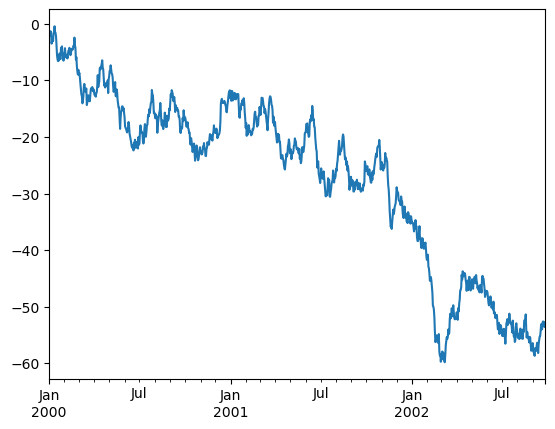

In [105]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))
ts = ts.cumsum()
ts.plot()

On DataFrame,plot() is a convenience to plot all of the columns with labels: